In [1]:
import pandas as pd
import matplotlib
import scipy.stats
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
cases_train = pd.read_csv('../data/cases_train.csv')
# cases_train = cases_train
# cases_test = pd.read_csv('../data/cases_test.csv')


In [3]:
# print(cases_train)

<h1> Exploratory data analysis: Cases_train </h1>

<h1>Age</h1>

In [4]:
age = cases_train.age

nan_count = age.isna().sum()

age = pd.DataFrame(age)

for index, r in age.iterrows():
    row = r[0]

    if r.isnull().values.any():
        pass
    elif re.match('\d+ *- *\d+', row): #re.match('[0-9][0-9]-[0-9][0-9]', row) or re.match('[0-9]-[0-9][0-9]', row) or re.match('[0-9]-[0-9]', row) or re.match('[0-9][0-9] - [0-9][0-9]', row): # '54-56'
        val = str(row).split('-')
        avg = (int(val[0])+int(val[1]))/2
        age.loc[index] = int(avg)
    elif re.match('\d+ *months*', row): #re.match('[0-9] month', row): # '8 month'
        val = str(row).split('month')
        val = float(val[0].strip())
        age.loc[index] = int(val/12)
    elif re.match('[0-9][0-9][-|+]$', row): # '80+', '80-'
        age.loc[index] = int(row[0]+row[1])
    else: # converts floats to ints for all other cases
        age.loc[index] = int(float(row))


age = age.dropna()

#age.age.unique()
age

,age
3,24
7,47
10,24
16,60
18,73
...,...
367626,31
367627,69
367631,15
367634,28


In [72]:
# print(type(age.age))
# print("Mean age: ", age.age.mean())
# print("Median age: ", age.age.median())
# print("Modal age: ", age.age.mode()[0])
print("NaN count age: ", nan_count)
print(age.age.astype(float).describe())

NaN count age:  2
count    158371.000000
mean         43.678350
std          19.752695
min           0.000000
25%          28.000000
50%          44.000000
75%          57.000000
max         106.000000
Name: age, dtype: float64


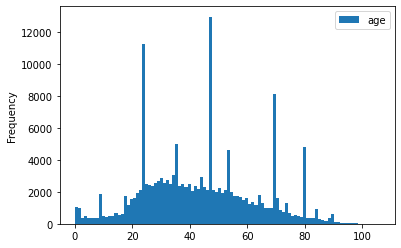

In [6]:
hist = age.plot.hist(bins=100)

<AxesSubplot:>

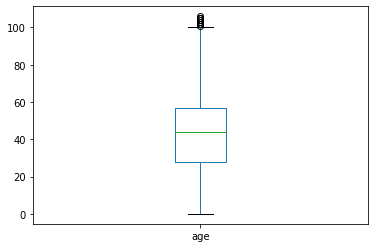

In [62]:
age.plot.box()

<h1> Latitude & Longitude </h1>

NaN count Lat Long_ pair:  2


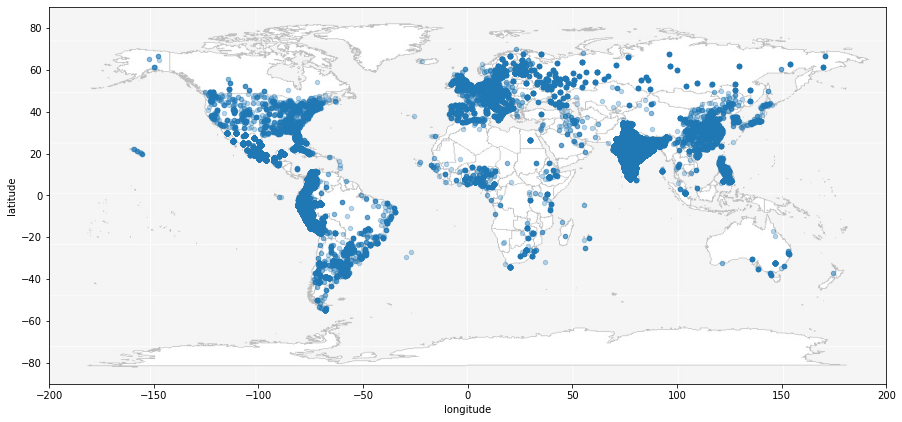

In [28]:
latlong = cases_train[["latitude", "longitude"]]
empty = latlong[latlong.isnull().any(axis =1)]
# print (empty)
print ("NaN count Lat Long_ pair: ", empty.shape[0])

world_map = mpimg.imread('wrldmap.jpg')
latlong.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3, figsize=(15, 12))
plt.imshow(world_map, extent=[-200, 200, -90, 90], alpha=0.5)
plt.show()


<h1> Sex </h1>

NaN count sex:  207084


<AxesSubplot:>

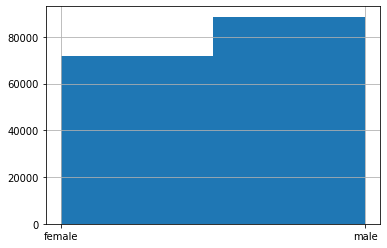

In [8]:
sex = cases_train.sex

nan_count = sex.isna().sum()
print ("NaN count sex: ", nan_count)
sex = sex.dropna()
unique = sex.unique().shape[0]
sex.hist(bins = unique)

<h1> Outcome </h1>

NaN count outcome:  0


<AxesSubplot:>

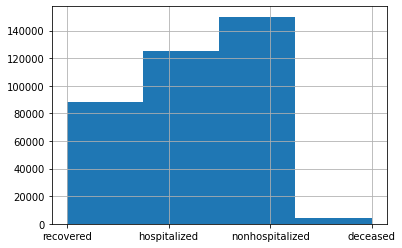

In [9]:
outcome = cases_train.outcome
nan_count = outcome.isna().sum()
print ("NaN count outcome: ", nan_count)
outcome = outcome.dropna()
unique = outcome.unique().shape[0]
outcome.hist(bins = unique)

<h1> Country </h1>

NaN count country:  18


<AxesSubplot:>

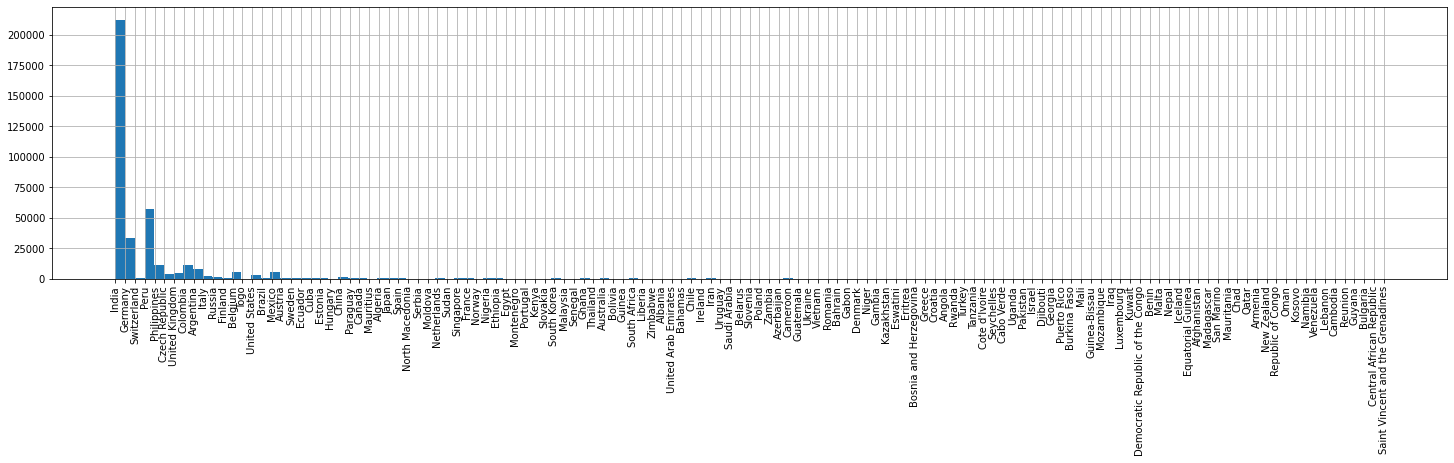

In [10]:
country = cases_train.country
nan_count = country.isna().sum()
print ("NaN count country: ", nan_count)
country = country.dropna()
unique = country.unique().shape[0]
# print (unique)
country.hist(bins = unique, xrot= 90, figsize= (25,5))

<h1> Province </h1>

NaN count province:  4106
55


<AxesSubplot:>

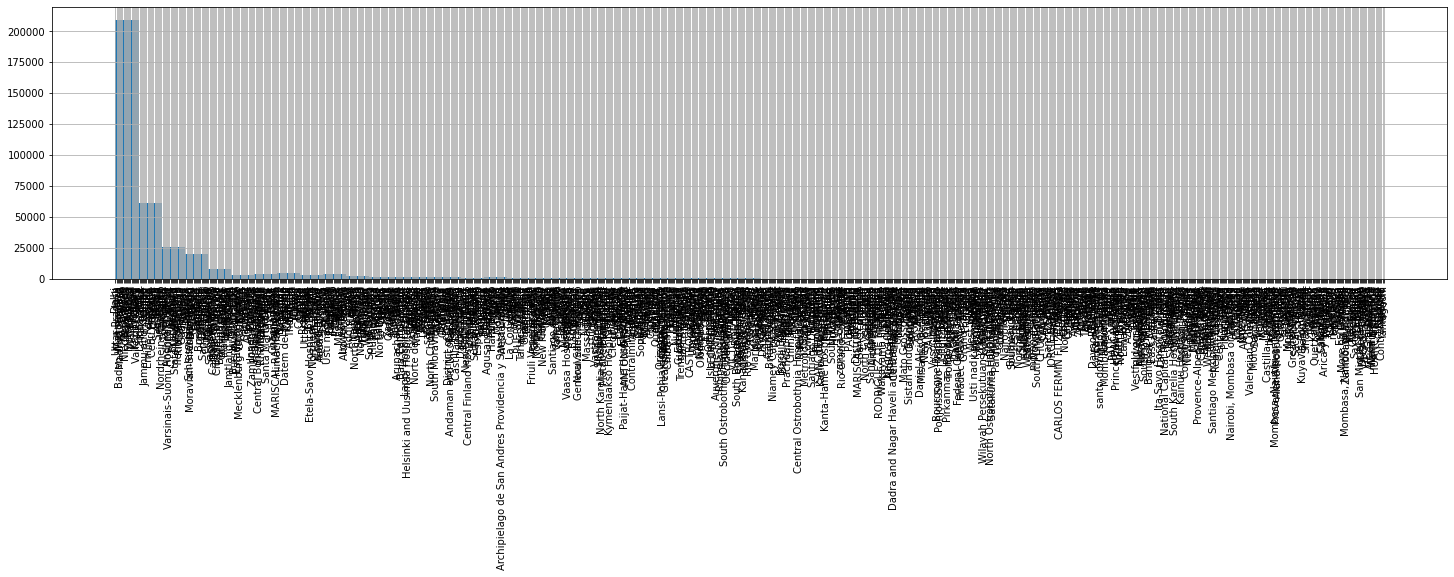

In [13]:
province = cases_train.province
nan_count = province.isna().sum()
print ("NaN count province: ", nan_count)
province = province.dropna()
unique = int(province.unique().shape[0] / 20)
print (unique)
province.hist(bins = unique, xrot= 90, figsize= (25,5))

<h1> Date Confirmation </h1>

NaN count date_confirmation:  288


<AxesSubplot:>

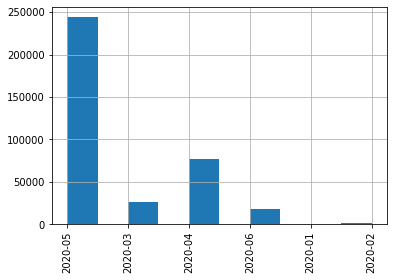

In [12]:
date_confirm = cases_train.date_confirmation
nan_count = date_confirm.isna().sum()
print ("NaN count date_confirmation: ", nan_count)
date_confirm = date_confirm.dropna()

index = date_confirm[date_confirm.str.contains("-")].index

for i in index:
    date = date_confirm[i]
    date = date.split('-')[0].strip()
    date_confirm[i] = date

date_confirm = pd.to_datetime(date_confirm, infer_datetime_format=True)

month_year = date_confirm.dt.to_period('M')
unique = month_year.unique().shape[0]
month_year.unique()

month_year = month_year.dt.strftime('%Y-%m')
month_year.hist(xrot= 90)


<h1> Exploratory data analysis: Location </h1>

In [15]:
location = pd.read_csv('../data/location.csv')
location

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,Afghanistan,2020-09-20 04:22:56,33.939110,67.709953,38919,1437,32576,4906.0,Afghanistan,99.976005,3.692284
1,NaN,Albania,2020-09-20 04:22:56,41.153300,20.168300,12226,358,6888,4980.0,Albania,424.838418,2.928186
2,NaN,Algeria,2020-09-20 04:22:56,28.033900,1.659600,49623,1665,34923,13035.0,Algeria,113.162645,3.355299
3,NaN,Andorra,2020-09-20 04:22:56,42.506300,1.521800,1564,53,1164,347.0,Andorra,2024.202420,3.388747
4,NaN,Angola,2020-09-20 04:22:56,-11.202700,17.873900,3901,147,1445,2309.0,Angola,11.869312,3.768265
...,...,...,...,...,...,...,...,...,...,...,...,...
3949,NaN,West Bank and Gaza,2020-09-20 04:22:56,31.952200,35.233200,35003,253,23446,11304.0,West Bank and Gaza,686.142828,0.722795
3950,NaN,Western Sahara,2020-09-20 04:22:56,24.215500,-12.885800,10,1,8,1.0,Western Sahara,1.674116,10.000000
3951,NaN,Yemen,2020-09-20 04:22:56,15.552727,48.516388,2026,585,1221,220.0,Yemen,6.792738,28.874630
3952,NaN,Zambia,2020-09-20 04:22:56,-13.133897,27.849332,14070,330,13365,375.0,Zambia,76.534126,2.345416


<h1> Province State </h1>

NaN count province:  168


<AxesSubplot:>

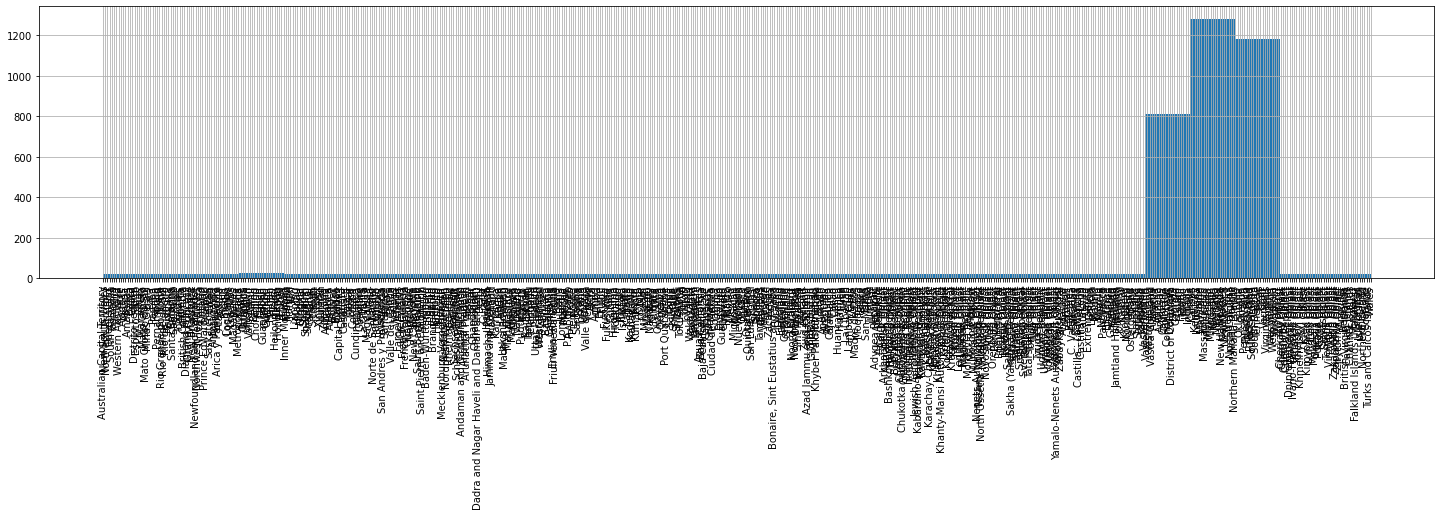

In [18]:
province = location.Province_State
nan_count = province.isna().sum()
print ("NaN count province: ", nan_count)
province = province.dropna()
unique = int(province.unique().shape[0] / 20)
# print (unique)
province.hist(bins = unique, xrot= 90, figsize= (25,5))

<h1> Country Region </h1>

NaN count country:  0


<AxesSubplot:>

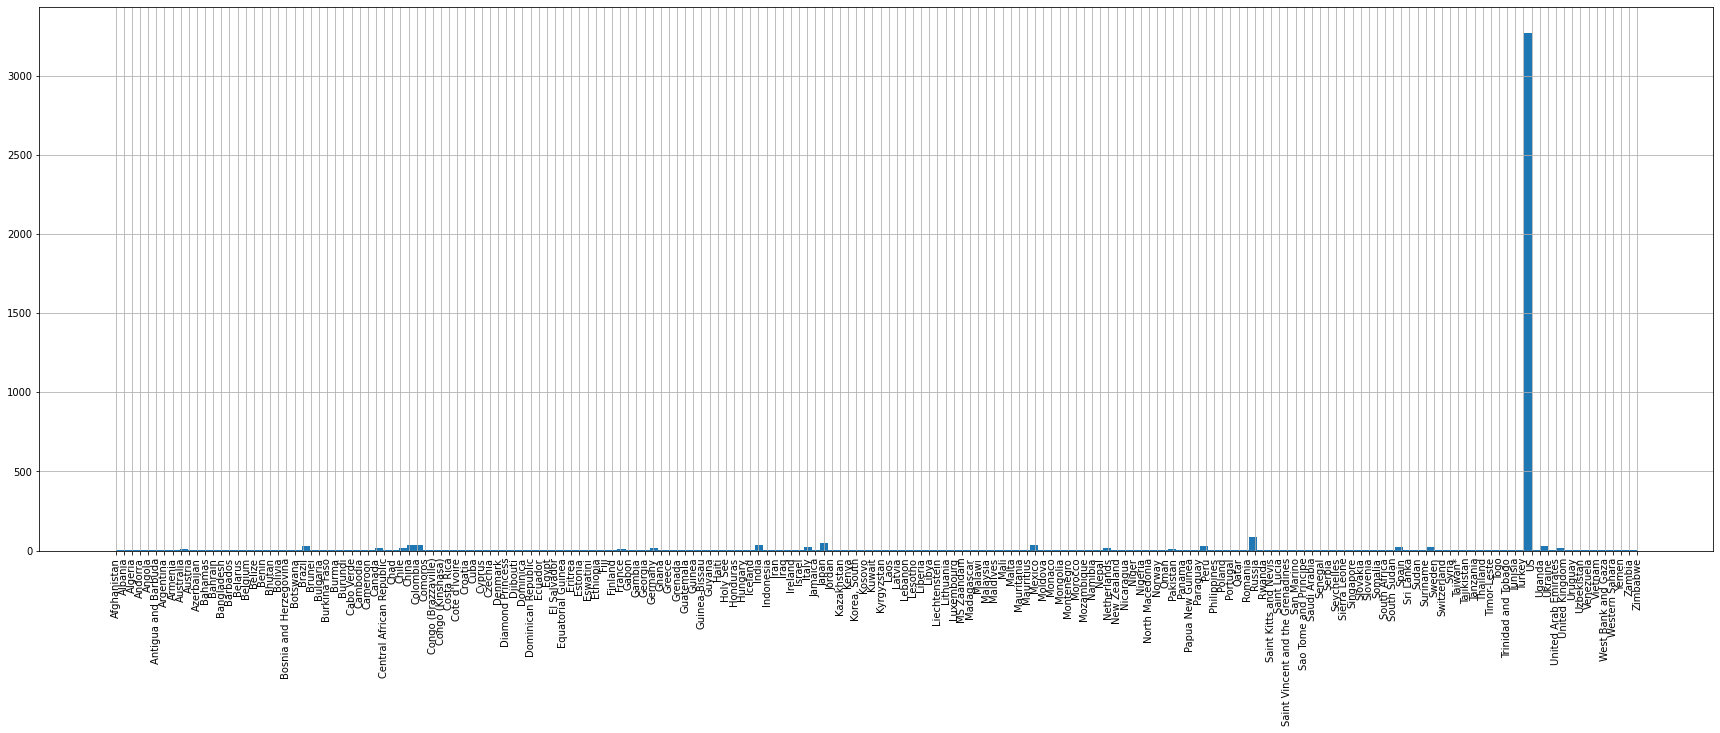

In [22]:
country = location.Country_Region
nan_count = country.isna().sum()
print ("NaN count country: ", nan_count)
country = country.dropna()
unique = country.unique().shape[0]
# print (unique)
country.hist(bins = unique, xrot= 90, figsize= (30,10))

<h1> Latitude & Longitude </h1>

NaN count Lat Long_ pair:  80


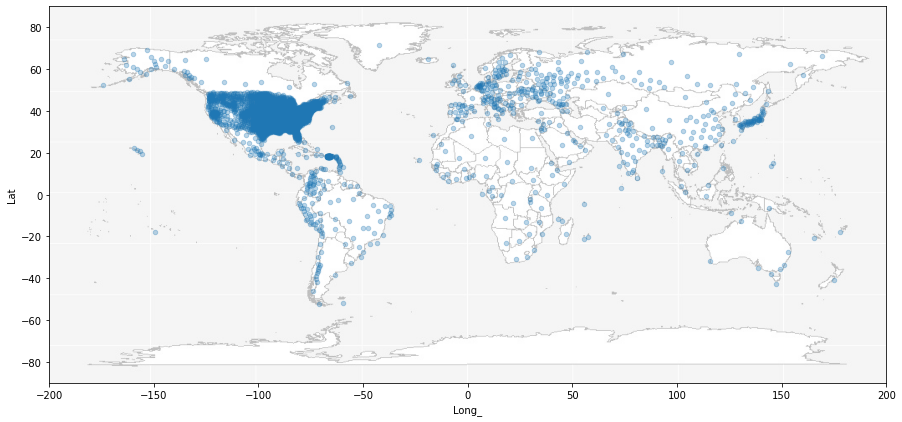

In [26]:
latlong = location[["Lat", "Long_"]]
empty = latlong[latlong.isnull().any(axis =1)]
# print (empty)
print ("NaN count Lat Long_ pair: ", empty.shape[0])

world_map = mpimg.imread('wrldmap.jpg')
latlong.plot(kind="scatter", x="Long_", y="Lat", alpha=0.3, figsize=(15, 12))
plt.imshow(world_map, extent=[-200, 200, -90, 90], alpha=0.5)
plt.show()


In [29]:
location[location['Country_Region'] != location['Combined_Key']]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
8,Australian Capital Territory,Australia,2020-09-20 04:22:56,-35.4735,149.0124,113,3,110,0.0,"Australian Capital Territory, Australia",26.395702,2.654867
9,New South Wales,Australia,2020-09-20 04:22:56,-33.8688,151.2093,4200,53,2994,1153.0,"New South Wales, Australia",51.736881,1.261905
10,Northern Territory,Australia,2020-09-20 04:22:56,-12.4634,130.8456,33,0,31,2.0,"Northern Territory, Australia",13.436482,0.000000
11,Queensland,Australia,2020-09-20 04:22:56,-27.4698,153.0251,1152,6,1123,23.0,"Queensland, Australia",22.519793,0.520833
12,South Australia,Australia,2020-09-20 04:22:56,-34.9285,138.6007,466,4,462,0.0,"South Australia, Australia",26.530031,0.858369
...,...,...,...,...,...,...,...,...,...,...,...,...
3940,Northern Ireland,United Kingdom,2020-09-20 04:22:56,54.7877,-6.4923,9165,575,0,8590.0,"Northern Ireland, United Kingdom",487.085459,6.273868
3941,Scotland,United Kingdom,2020-09-20 04:22:56,56.4907,-4.2026,24126,2505,0,21621.0,"Scotland, United Kingdom",441.601230,10.382989
3942,Turks and Caicos Islands,United Kingdom,2020-09-20 04:22:56,21.6940,-71.7979,668,5,572,91.0,"Turks and Caicos Islands, United Kingdom",1725.295728,0.748503
3943,Unknown,United Kingdom,2020-09-20 04:22:56,NaN,NaN,0,0,0,0.0,"Unknown, United Kingdom",NaN,NaN


<h1> Confirmed </h1> 

NaN count confirmed:  0
count    3.954000e+03
mean     7.760496e+03
std      4.184036e+04
min      0.000000e+00
25%      1.370000e+02
50%      4.985000e+02
75%      2.129000e+03
max      1.167496e+06
Name: Confirmed, dtype: float64


<AxesSubplot:ylabel='Frequency'>

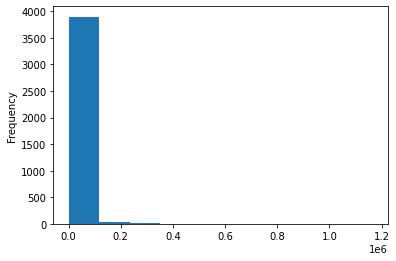

In [73]:
confirmed = location['Confirmed']
nan_count = confirmed.isna().sum()
confirmed = confirmed.dropna()

print ("NaN count confirmed: ", nan_count)
# print("Mean confirmed: ", confirmed.mean())
# print("Median confirmed: ", confirmed.median())
# print("Modal confirmed: ", confirmed.mode()[0])


confirmed = confirmed.astype(int)
print(confirmed.describe())
confirmed.plot.hist()

# Most regoins(about 3.5K) have around 0.1 * 10^6 confirmed cases
# Only a few regoins have very high confirmed case rate  
# data very skewed



<AxesSubplot:>

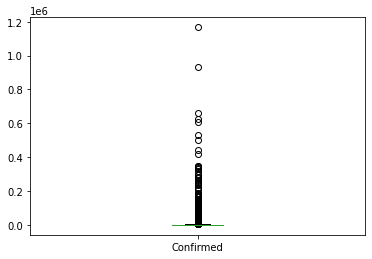

In [74]:
confirmed.plot.box()

<h1> Deaths </h1>

NaN count deaths:  0
count     3954.000000
mean       241.740769
std       1476.661533
min          0.000000
25%          1.000000
50%          9.000000
75%         48.000000
max      37076.000000
Name: Deaths, dtype: float64


<AxesSubplot:ylabel='Frequency'>

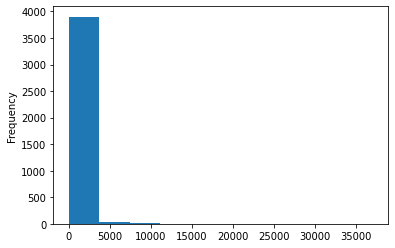

In [76]:
deaths = location['Deaths']
nan_count = deaths.isna().sum()
deaths = deaths.dropna()

print ("NaN count deaths: ", nan_count)
# print("Mean deaths: ", deaths.mean())
# print("Median deaths: ", deaths.median())
# print("Modal confirmed: ", confirmed.mode()[0])


deaths = deaths.astype(int)
print(deaths.describe())
deaths.plot.hist()

# Most regoins(about 3.5K) have around 0-5000 deaths
# Only a few regoins have very high death rate  
# data very skewed

<AxesSubplot:>

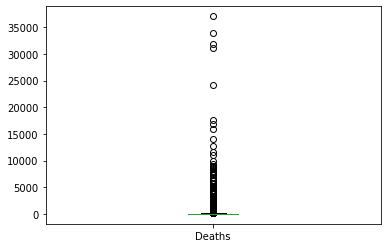

In [75]:
deaths.plot.box()

<h1> Recovered </h1>

NaN count recovered:  0
count    3.954000e+03
mean     5.291398e+03
std      5.315287e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.577446e+06
Name: Recovered, dtype: float64


<AxesSubplot:ylabel='Frequency'>

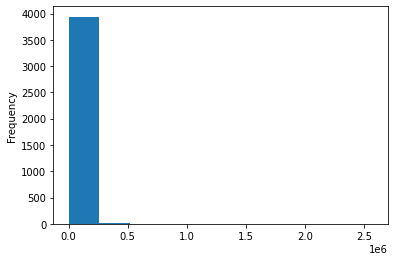

In [77]:
recovered = location['Recovered']
nan_count = recovered.isna().sum()
recovered = recovered.dropna()

print ("NaN count recovered: ", nan_count)
# print("Mean recovered: ", recovered.mean())
# print("Median recovered: ", recovered.median())
# print("Modal confirmed: ", confirmed.mode()[0])


recovered = recovered.astype(int)
print(recovered.describe())
recovered.plot.hist()

# Most regoins(about 3.5K) have around 0.25*10^6 recovered 
# data very skewed

<AxesSubplot:>

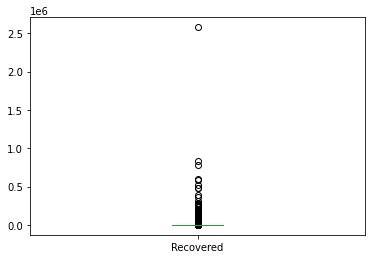

In [78]:
recovered.plot.box()

<h1> Active </h1>

NaN count active:  2
count      3946.000000
mean       3035.938672
std       14041.930549
min           0.000000
25%         114.000000
50%         422.000000
75%        1453.000000
max      337913.000000
Name: Active, dtype: float64


<AxesSubplot:ylabel='Frequency'>

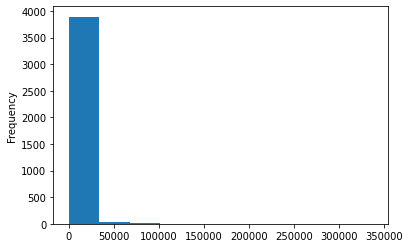

In [80]:
active = location['Active']
nan_count = active.isna().sum()
active = active.dropna()
active = active.drop(active[active<0].index)
print ("NaN count active: ", nan_count)
# print("Mean active: ", active.mean())
# print("Median active: ", active.median())
# print("Max active: ", active.max())
# print("Min active: ", active.min())
# p = active[active<0]
# print (p)
# print("Modal confirmed: ", confirmed.mode()[0])


active = active.astype(int)
print(active.describe())
active.plot.hist()



# Most regoins(about 3.5K) have around 0.25*10^6 recovered 
# data very skewed

<AxesSubplot:>

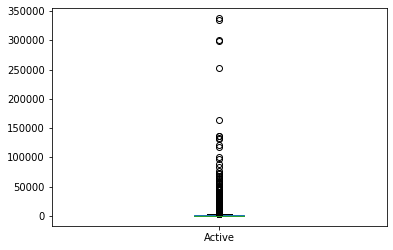

In [79]:
active.plot.box()

<h1> Incidence Rate </h1>

NaN count active:  80
count     3874.000000
mean      1538.074084
std       1368.457772
min          0.000000
25%        618.250000
50%       1204.000000
75%       2097.750000
max      14871.000000
Name: Incidence_Rate, dtype: float64


<AxesSubplot:ylabel='Frequency'>

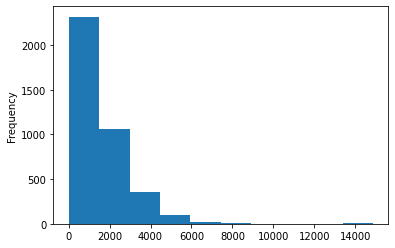

In [82]:
incident_r = location['Incidence_Rate']
nan_count = incident_r.isna().sum()
incident_r = incident_r.dropna()
print ("NaN count active: ", nan_count)

incident_r = incident_r.astype(int)
print(incident_r.describe())
incident_r.plot.hist()

<AxesSubplot:>

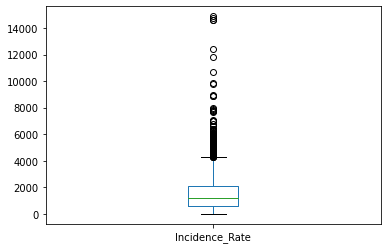

In [83]:
incident_r.plot.box()

<h1> Case Fatality Ratio </h1>

NaN count active:  48
count    3906.000000
mean        1.939324
std         3.495328
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       108.000000
Name: Case-Fatality_Ratio, dtype: float64


<AxesSubplot:ylabel='Frequency'>

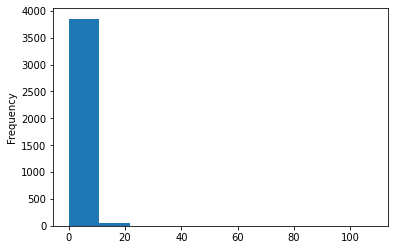

In [84]:
cfr = location['Case-Fatality_Ratio']
nan_count = cfr.isna().sum()
cfr = cfr.dropna()
print ("NaN count active: ", nan_count)

cfr = cfr.astype(int)
print(cfr.describe())
cfr.plot.hist()

<AxesSubplot:>

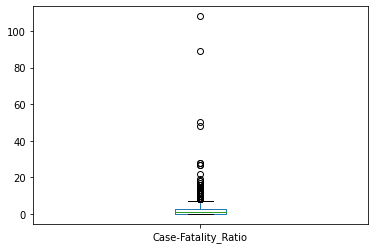

In [85]:
cfr.plot.box()